In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are 24 floats and 1 object present in this dataset

In [5]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns available in this dataset

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values present in this dataset. I think there is no value of 'Station' & 'Date' columns so, need to drop

In [7]:
df=df.drop(['station','Date'], axis=1)

There are less null values present in this dataset. So, I will identify the rows where null values present and remove these columns 


In [8]:
nulloc=df.loc[df[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']].isnull().any(1)].index.tolist()

In [9]:
nulloc

[225,
 271,
 300,
 450,
 464,
 627,
 831,
 856,
 881,
 913,
 945,
 975,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1073,
 1098,
 1123,
 2465,
 2490,
 2918,
 3383,
 3696,
 3714,
 3718,
 3721,
 3739,
 3764,
 3886,
 3911,
 4061,
 4205,
 4208,
 4220,
 4230,
 4255,
 4280,
 4305,
 4738,
 5208,
 5425,
 5426,
 5427,
 5428,
 5429,
 5430,
 5431,
 5432,
 5433,
 5434,
 5435,
 5436,
 5437,
 5438,
 5439,
 5440,
 5441,
 5442,
 5443,
 5444,
 5445,
 5446,
 5447,
 5448,
 5449,
 5583,
 5656,
 5681,
 5706,
 5925,
 5926,
 5927,
 5928,
 5929,
 5930,
 5931,
 5932,
 5933,
 5934,
 5935,
 5936,
 5937,
 5938,
 5939,
 5940,
 5941,
 5942,
 5943,
 5944,
 5945,
 5946,
 5947,
 5948,
 5949,
 6060,
 6085,
 6208,
 6210,
 6211,
 6213,
 6214,
 6218,
 6219,
 6220,
 6223,
 6253,
 6268,
 6293,
 6311,
 6340,
 6357,
 6360,
 6373,
 6382,
 6435,
 6460,
 6662,
 6907,
 6932,
 7032,
 7112,
 7254,
 727

In [10]:
df=df.drop(nulloc, axis=0)

In [11]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
df.shape

(7590, 23)

After removing null value rows from the dataset, I have 7590 rows available for model builidng. Earlier I had 7752 rows. It means I have lost arount 162 rows which is very less.

In [13]:
for i in df:
    print(df[i].value_counts(), '\n')

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64 

24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
16.2      1
14.3      1
29.7      1
29.1      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64 

71.658089    2
77.030350    2
98.524734    2
51.810596    2
19.794666    2
            ..
54.503193    1
58.950947    1
58.566174    1
59.790348    1
22.933014    1
Name: LDAPS_RHmin, Length: 7585, dtype: int64 

96.525200    2
94.795967    2
91.878174    2
58.936283    2
88.938194    2
            ..
84.423607    1
81.810715    1
92.785057    1
91.507935    1
77.243744    1
Name: LDAPS_RHmax, Length: 7577, dtype: int64 

38.542255    2
17.624954    2
28.074101    1
31.456930    1
31.554406    1
            ..
27.737869    1
28.321177    1
27.629996    1
28.775293    1
27.939516    1
Name: LDAPS_Tmax_lapse, Length: 7588, dtype: int6

There are 0 values in some columns. Data in these columns are splited into 6 hours. So, I will keep these data as it is

In [14]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,...,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000
mean,29.748116,23.195125,56.725610,88.358480,29.619723,23.511374,7.095487,62.502465,0.368541,0.355561,...,0.483460,0.277021,0.267497,37.544794,126.991417,61.931426,1.260118,5343.676114,30.240975,22.910198
std,2.970487,2.405675,14.638640,7.207666,2.948107,2.345718,2.183869,33.737553,0.262349,0.258016,...,1.759916,1.159786,1.194419,0.050445,0.079249,54.346782,1.373369,429.948182,3.116472,2.486762
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.600000,45.960060,84.203716,27.673584,22.086632,5.675345,37.206063,0.146544,0.140187,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.840942,28.200000,21.300000
50%,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,32.000000,24.800000,67.116507,93.743328,31.711219,25.155860,8.029139,84.239741,0.574550,0.557188,...,0.017824,0.007856,0.000018,37.577600,127.042000,59.832400,1.767800,5729.485840,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


All values are present in this dataset.

There are some outlier present in some columns i.e. LBAPS_PPT2 to LBAPS_PPT4.

Std. division and mean value are not proper in same columns. I will try find out outliers by using distplot.


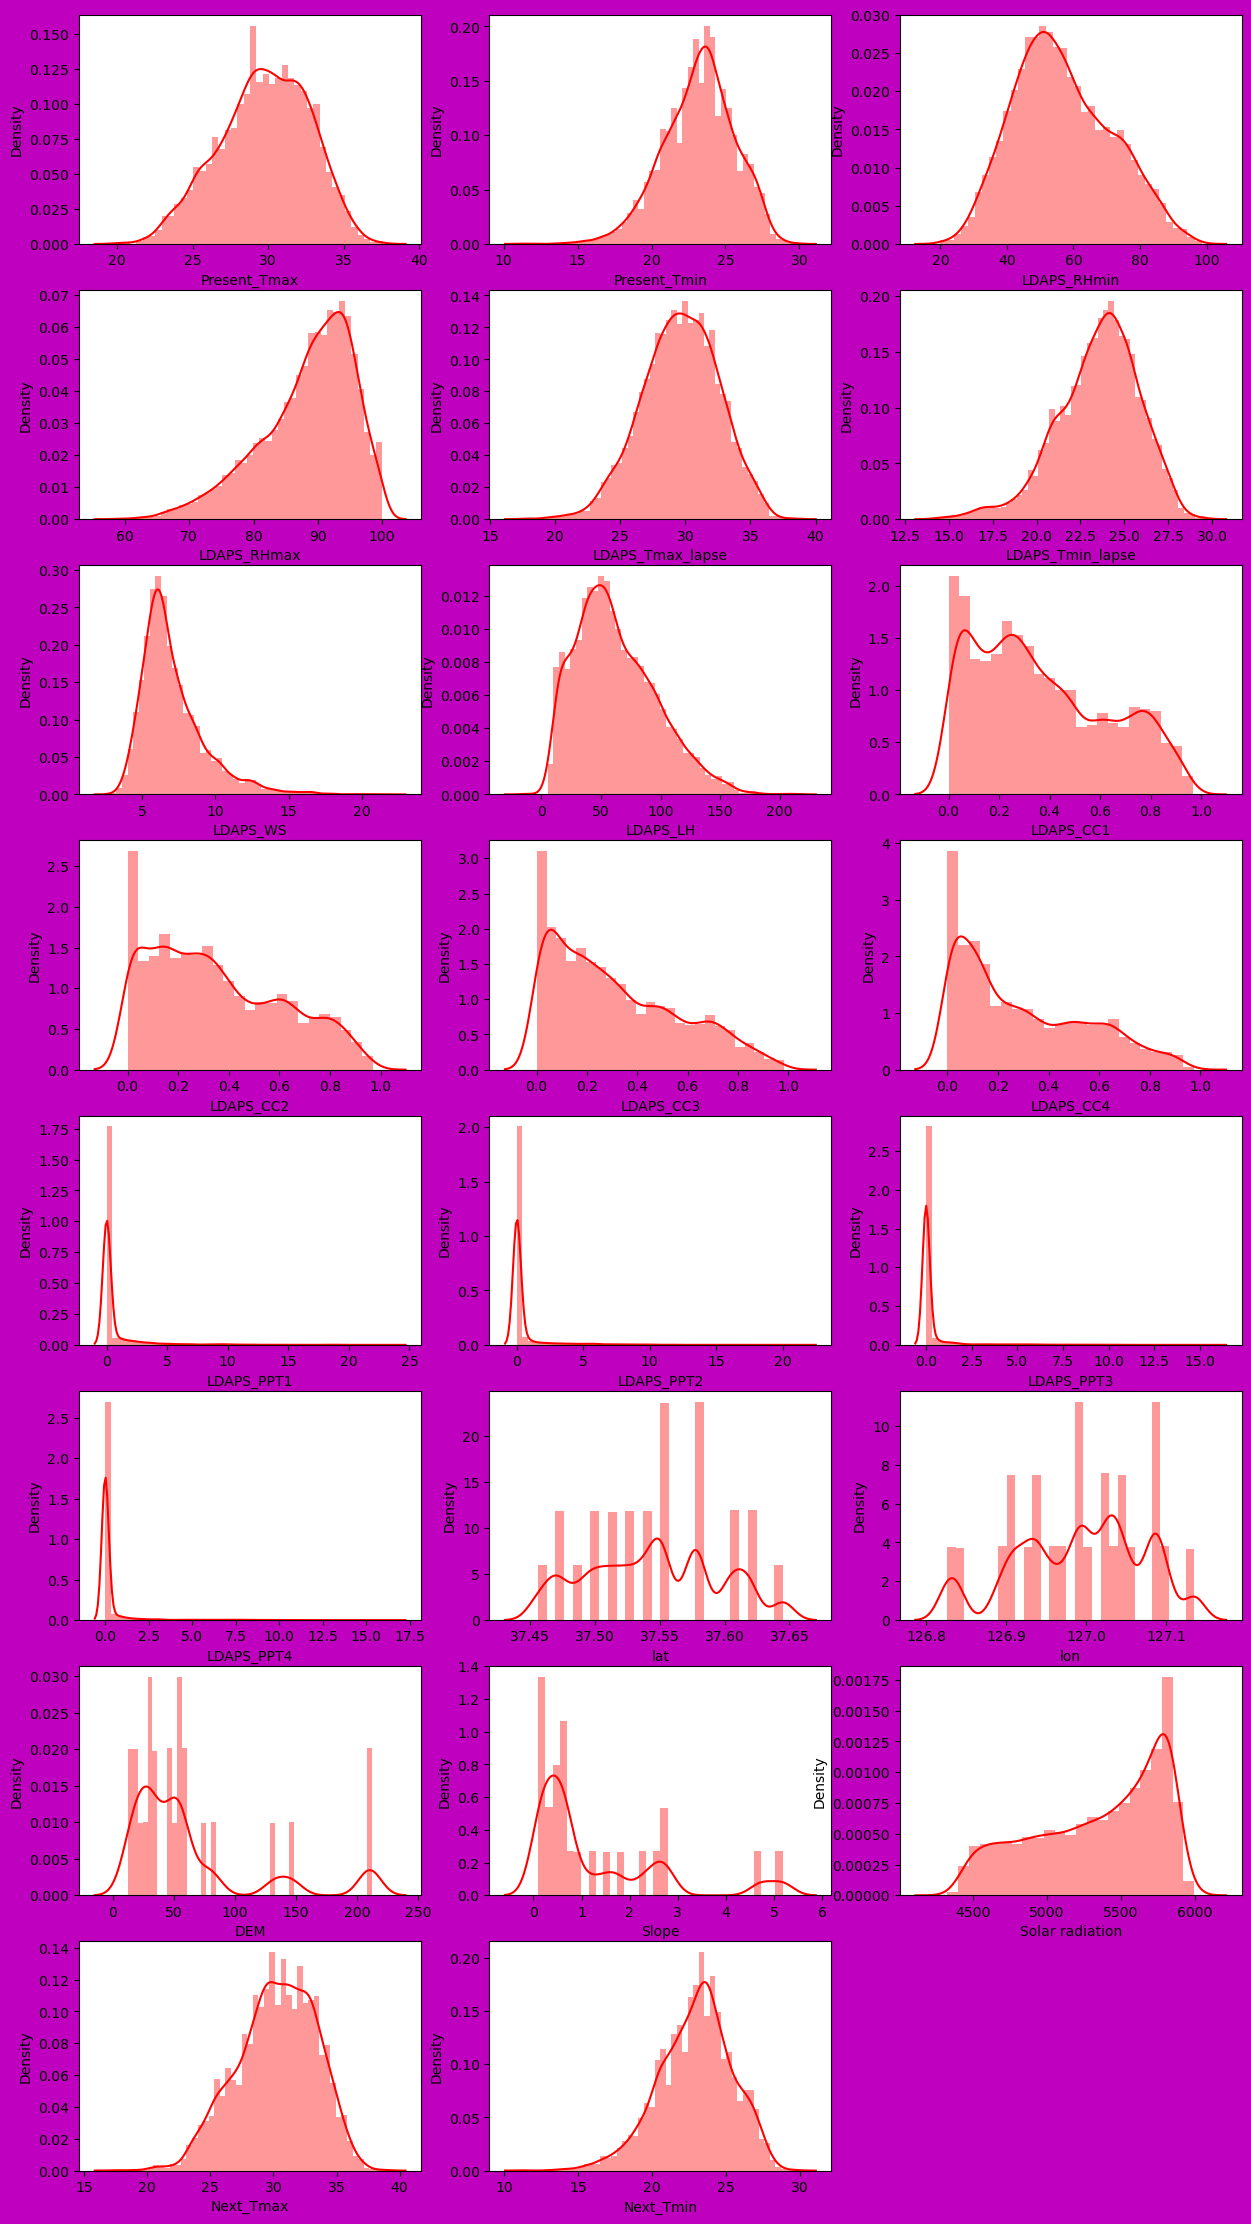

In [15]:
#Checking outliers in dataset by using distplot
plt.figure(figsize=(15,28), facecolor='m')
plotnumber=1

for i in df:
    if plotnumber<=23:
        ax=plt.subplot(8,3, plotnumber)
        sns.distplot(df[i], color='Red')
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
    
plt.show()

There are ouliers present in some columns i.e. LDAPS_PPT1, 2, 3 & 4. LDAPS_WS. I will check it again in boxplot.

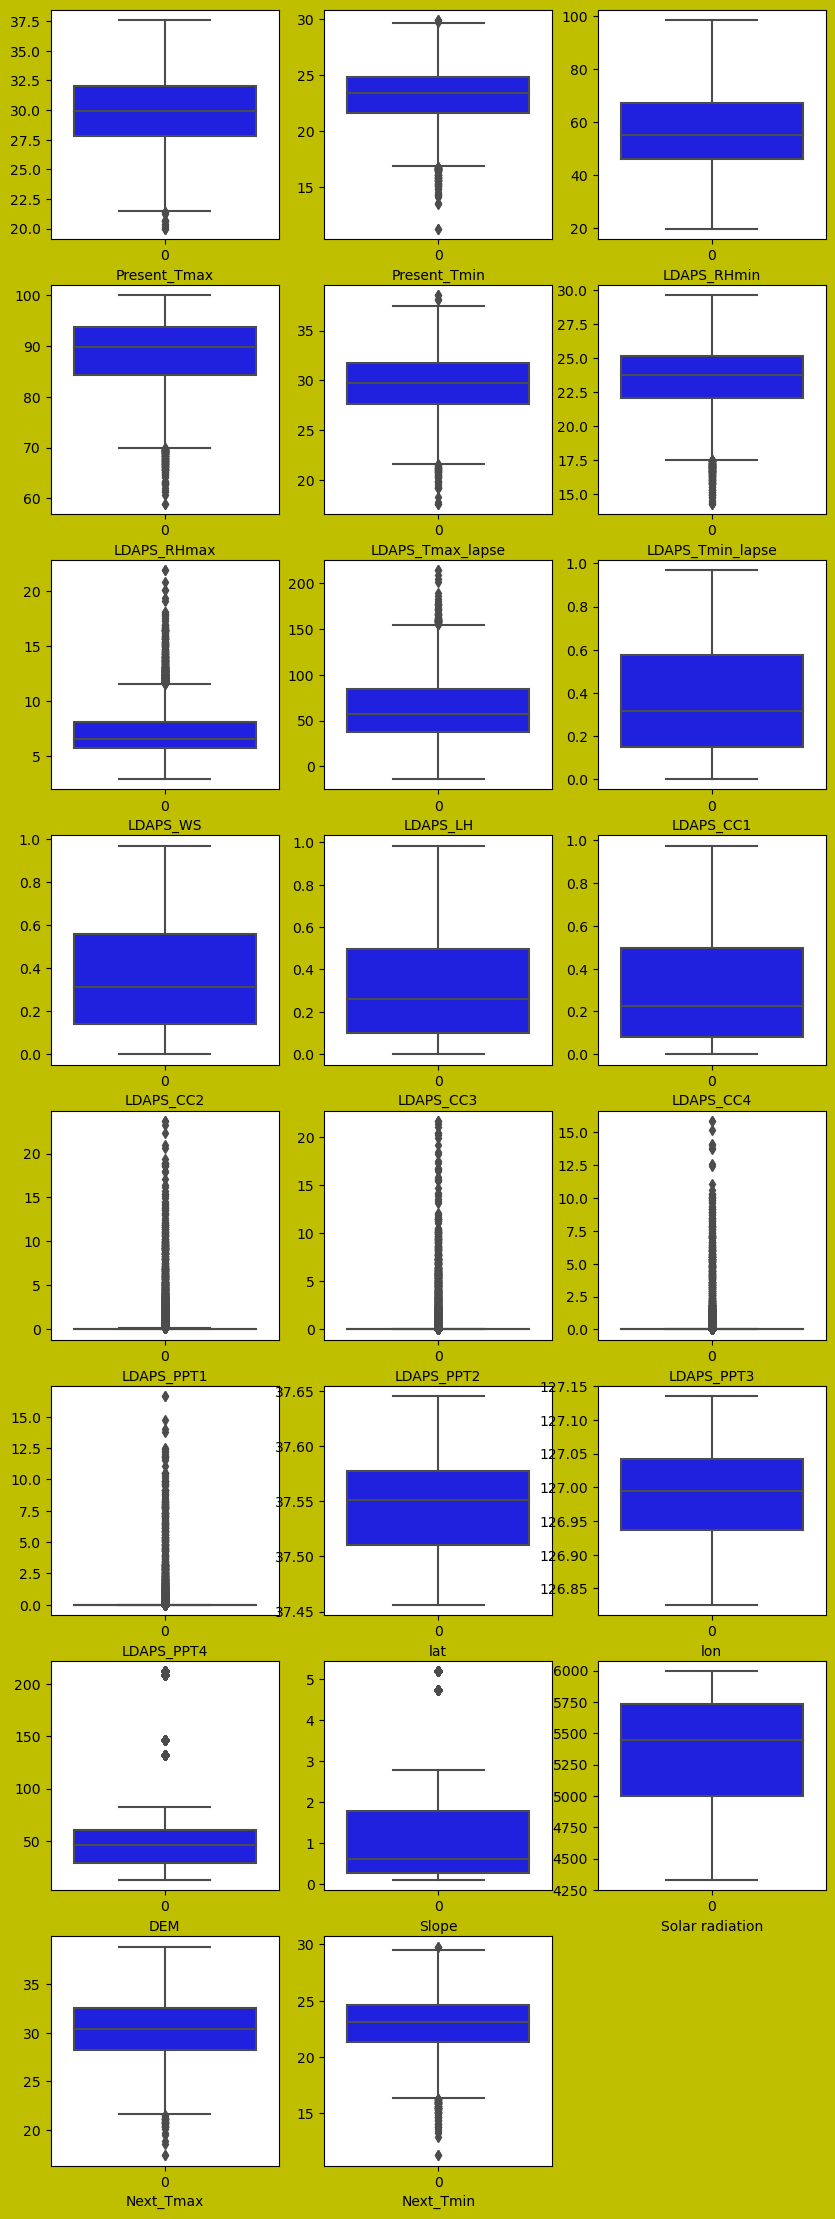

In [16]:
#Checking outliers in box plot also
plt.figure(figsize=(10,28), facecolor='y')
plotnumber=1

for i in df:
    if plotnumber<=23:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [17]:
#Using zscore technique to remove outliers from the dataset.
from scipy.stats import zscore
z_score=zscore(df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']])

In [18]:
abs_z_score=np.abs(z_score)

In [19]:
filter_entry=(abs_z_score<3).all(axis=1)

In [20]:
df=df[filter_entry]

In [21]:
df.shape

(6748, 23)

In [22]:
#After removing the outliers now I have 6748 rows. Before removing outliers I had 7752 rows.

In [24]:
# I have tried to remove outlier from dataset. But still there are some outliers present. I will now use the same dataset which alvailabel after removing outliers

In [25]:
#Checking multicollinearity issue by using correlation matrix
df_corr=df.corr().abs()

<Axes: >

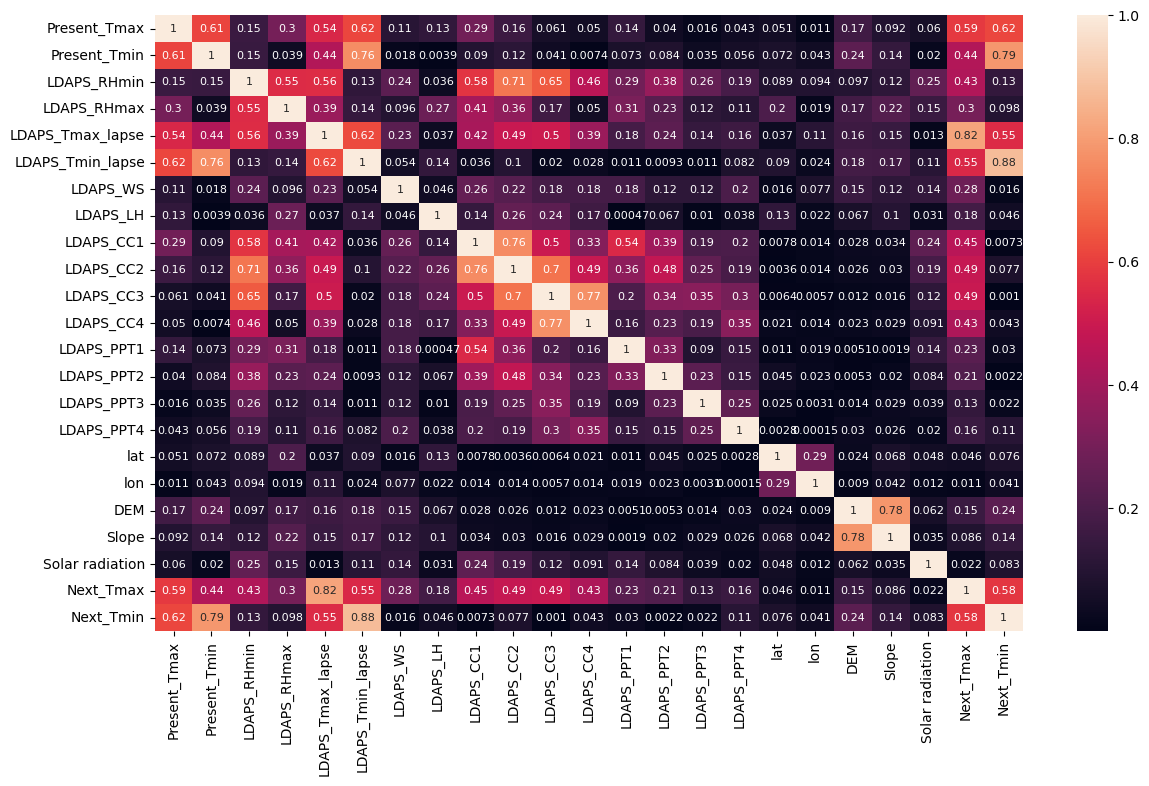

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':8})

In [27]:
#I can see there is correlation in some columns. Now, I will try to find it by using VIF. 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
x=df.drop('Next_Tmax',axis=1)
y=df.Next_Tmax

In [30]:
x_scaled=scaler.fit_transform(x)

In [31]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,2.719423,Present_Tmax
1,3.322369,Present_Tmin
2,5.964527,LDAPS_RHmin
3,2.218551,LDAPS_RHmax
4,6.924314,LDAPS_Tmax_lapse
5,8.897077,LDAPS_Tmin_lapse
6,1.219854,LDAPS_WS
7,1.532088,LDAPS_LH
8,3.542062,LDAPS_CC1
9,4.684618,LDAPS_CC2


In [32]:
#There are two columns where VIF value is high. So, I will try to remove these columns

In [33]:
df=df.drop(['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'], axis=1)

In [34]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## Now I am going to buil the model on 'Next_Tmax' target

In [35]:
x=df.drop('Next_Tmax', axis=1)

In [36]:
y=df.Next_Tmax

In [37]:
x_scaled=scaler.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
ls=Lasso()
rd=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gdr=GradientBoostingRegressor()

In [40]:
mdl=[lr,rfr,dtr,knn,ls,rd,etr,svr,gdr]

In [41]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=r2_score(y_train, y_pred)
        print('r2_score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=r2_score(y_test, pred)
        print('r2_score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

r2_score of Train Data: 73.78949508470198
r2_score of Test Data: 73.08217154430004
Model Name:  LinearRegression()


r2_score of Train Data: 98.34878591678805
r2_score of Test Data: 88.75337872226302
Model Name:  RandomForestRegressor()


r2_score of Train Data: 100.0
r2_score of Test Data: 74.13324063384934
Model Name:  DecisionTreeRegressor()


r2_score of Train Data: 88.59173763693323
r2_score of Test Data: 82.32387577526868
Model Name:  KNeighborsRegressor()


r2_score of Train Data: 40.772914449449324
r2_score of Test Data: 41.250935149252896
Model Name:  Lasso()


r2_score of Train Data: 73.78949097011585
r2_score of Test Data: 73.08198964782422
Model Name:  Ridge()


r2_score of Train Data: 99.99999999539541
r2_score of Test Data: 91.67687505891257
Model Name:  ExtraTreesRegressor()


r2_score of Train Data: 86.13060095078224
r2_score of Test Data: 83.24790562046172
Model Name:  SVR()


r2_score of Train Data: 84.7650930430212
r2_score of Test Data: 81.5665475943869
Model Name: 

In [42]:
#ExtraTreeRegressor is giving me good score. So, I will try to check CV score of this model.
from sklearn.model_selection import cross_val_score

In [43]:
ypredetr=etr.predict(x_test)
r2etr=r2_score(y_test, ypredetr)
score=cross_val_score(etr, x_scaled,y, cv=5, scoring='r2')
print('ExtraTreeRegressor R2 Score is: ',r2etr)
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2etr)-(score.mean()))

ExtraTreeRegressor R2 Score is:  0.9167687505891257
[0.64557262 0.5207033  0.53121019 0.69179147 0.59518128]
0.5968917728904092
Different Between R2 score and cross validation score:  0.3198769776987165


In [45]:
#SVR also give the highest score. So, I am cross validate this model also.
ypredsvr=svr.predict(x_test)
r2svr=r2_score(y_test, ypredsvr)
score=cross_val_score(svr, x_scaled,y, cv=5, scoring='r2')
print('SVR R2 Score is: ',r2svr)
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2svr)-(score.mean()))

SVR R2 Score is:  0.8324790562046172
[0.70570178 0.54307121 0.56973003 0.68961383 0.67058143]
0.6357396572835139
Different Between R2 score and cross validation score:  0.19673939892110326


In [46]:
#RandomForestRegressor also give the highest score. So, I am cross validate this model also.
ypredrfr=svr.predict(x_test)
r2rfr=r2_score(y_test, ypredrfr)
score=cross_val_score(rfr, x_scaled,y, cv=5, scoring='r2')
print('RandomForestRegressor R2 Score is: ',r2rfr)
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2rfr)-(score.mean()))

RandomForestRegressor R2 Score is:  0.8324790562046172
[0.6376546  0.55855785 0.49489534 0.66087526 0.55812983]
0.5820225761050425
Different Between R2 score and cross validation score:  0.25045648009957466


After checking the CV score of ExtraTreeRegressor, SVR & RandomForestRegressor I found SVR has given the best score.So, I will try to tune SVR model for better score.

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={'C':[1,5,10,20],
            'gamma':[0.001,0.01,0.02,0.002]}

In [50]:
grisearch=GridSearchCV(svr, param_grid)

In [51]:
grisearch.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [52]:
grisearch.best_params_

{'C': 20, 'gamma': 0.02}

In [54]:
svr=SVR(C=20, gamma=0.02)

In [56]:
svr.fit(x_train, y_train)

SVR(C=20, gamma=0.02)

In [58]:
ypred=svr.predict(x_test)
r2score=r2_score(y_test, ypred)
print('SVR R2 Score is: ',r2score)

SVR R2 Score is:  0.8707258280138207


After Tuning the parameter of SVR. The final score of this model is 87%

# Now I am going to buil the model on 'Next_Tmin' target 

In [59]:
x=df.drop('Next_Tmin', axis=1)
y=df.Next_Tmin

In [60]:
x_scaled=scaler.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
ls=Lasso()
rd=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gdr=GradientBoostingRegressor()

In [63]:
mdl=[lr,rfr,dtr,knn,ls,rd,etr,svr,gdr]

In [64]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.30, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=r2_score(y_train, y_pred)
        print('r2_score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=r2_score(y_test, pred)
        print('r2_score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

r2_score of Train Data: 76.62599023780021
r2_score of Test Data: 76.93656885656273
Model Name:  LinearRegression()


r2_score of Train Data: 98.27688732545816
r2_score of Test Data: 88.92815857636536
Model Name:  RandomForestRegressor()


r2_score of Train Data: 100.0
r2_score of Test Data: 73.56682211488416
Model Name:  DecisionTreeRegressor()


r2_score of Train Data: 89.03573859264576
r2_score of Test Data: 84.67889932416267
Model Name:  KNeighborsRegressor()


r2_score of Train Data: 43.09033679535413
r2_score of Test Data: 44.019105061679
Model Name:  Lasso()


r2_score of Train Data: 76.62598662333257
r2_score of Test Data: 76.9364017537347
Model Name:  Ridge()


r2_score of Train Data: 100.0
r2_score of Test Data: 90.24550066722654
Model Name:  ExtraTreesRegressor()


r2_score of Train Data: 88.49167308358919
r2_score of Test Data: 85.97513063024978
Model Name:  SVR()


r2_score of Train Data: 86.90431981314505
r2_score of Test Data: 84.32440141672383
Model Name:  GradientBoosti

Almost All model has given me good score. So, I will check the CV Score on all the model.

In [66]:
models={'LinearRegression':lr,'RandomForestRegressor':rfr,'DecisionTreeRegressor':dtr,'KNN':knn,'Lasso':ls,'Ridge':rd,'ExtraTreesRegressor':etr,'SVR':svr,'GradientBoostingRegressor':gdr}

In [68]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,r2_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : LinearRegression()
Score:  [0.60252028 0.58177499 0.67453073 0.82395317 0.8063666 ]
Score Mean:  0.6978291540999912
diffrent Between Accuracy Score and CV score is : 0.14542456675915139


Model Name is : RandomForestRegressor()
Score:  [0.5158314  0.54834528 0.64379727 0.80004016 0.7615968 ]
Score Mean:  0.6539221841582135
diffrent Between Accuracy Score and CV score is : 0.1893661292842408


Model Name is : DecisionTreeRegressor()
Score:  [0.24419524 0.19610735 0.43366927 0.63349313 0.50122416]
Score Mean:  0.4017378289108535
diffrent Between Accuracy Score and CV score is : 0.44152142892738055


Model Name is : KNeighborsRegressor()
Score:  [0.39371348 0.3528269  0.53936123 0.62083858 0.68250156]
Score Mean:  0.5178483487216432
diffrent Between Accuracy Score and CV score is : 0.325417196941975


Model Name is : Lasso()
Score:  [0.30822733 0.17656955 0.3953648  0.36137389 0.45436217]
Score Mean:  0.33917954941954953
diffrent Between Accuracy Score and CV score is : 0.

Linear Regression has given the good R2 score after applying CV Score. Now I will try to hypertunning this model by using GridSearchCV

In [72]:
param={"fit_intercept": [True, False],
      "copy_X": [True, False],
      "n_jobs": [1,2,5,6]}

In [73]:
gridsearch=GridSearchCV(lr, param)

In [74]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 5, 6]})

In [78]:
gridsearch.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}

In [82]:
final_model=LinearRegression(copy_X=True, fit_intercept= True, n_jobs=1)

In [85]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test, pred)*100

In [86]:
acc

76.93656885656273

After tunning the parameter by using GridSearchCV on LiearRegression model I got final R2 score is 78% 